This notebook was created to develop/explore visualizations for the dashboard app.  This notebook is not used in the final ETL pipeline of or in the Dash app.

In [1]:
import pandas as pd
import numpy as np

# download the file and save it as defined
pkl_filepath = r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\Johns_Hopkins_Clean.pkl"

df = pd.read_pickle(pkl_filepath)

In [2]:
df.head(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,County,ConfirmedPerDate,RecoveredPerDate,DeathsPerDate,USstateAbbr
0,Anhui,China,1,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
1,Beijing,China,14,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
2,Chongqing,China,6,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
3,Fujian,China,1,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
4,Gansu,China,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan


In [3]:
# data is from https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv
us_pop_df = pd.read_csv(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_raw\co-est2019-alldata.csv",
                     encoding='cp1252')
us_pop_df.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567


In [4]:
us_pop_df = us_pop_df[us_pop_df.COUNTY > 0]
us_pop_df = us_pop_df[["STNAME", "CTYNAME", "POPESTIMATE2019"]]
us_pop_df.columns = ["State", "County", "Population"]
us_pop_df.State = us_pop_df.State.astype("category")
us_pop_df.County = us_pop_df.County.astype("category")
us_pop_df.head(3)

,State,County,Population
1,Alabama,Autauga County,55869
2,Alabama,Baldwin County,223234
3,Alabama,Barbour County,24686


In [5]:
# data from https://en.wikipedia.org/wiki/List_of_countries_by_population_%28United_Nations%29
world_pop_df = pd.read_csv(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_raw\Nation_Pop_Wikipedia_2020_04_08.csv", encoding='cp1252')
world_pop_df.head(3)

,Country or area,UN continental region,UN statistical region,Population_2018,Population_2019
0,China,Asia,Eastern Asia,1427647786,1433783686
1,India,Asia,Southern Asia,1352642280,1366417754
2,United States,Americas,Northern America,327096265,329064917


In [6]:
world_pop_df = world_pop_df[["Country or area", "Population_2019"]]
world_pop_df.columns = ["Country", "Population"]
world_pop_df.State = world_pop_df.Country.astype("category")
world_pop_df.head(3)

,Country,Population
0,China,1433783686
1,India,1366417754
2,United States,329064917


In [7]:
countries = df.loc[(df["Country/Region"] != "United States") & \
       (df["Province/State"] != "nan"), "Country/Region"].unique()
for country in countries:
    for region in df.loc[(df["Country/Region"] == country), "Province/State"].unique():
        print(country, ", ", region)

China ,  Anhui
China ,  Beijing
China ,  Chongqing
China ,  Fujian
China ,  Gansu
China ,  Guangdong
China ,  Guangxi
China ,  Guizhou
China ,  Hainan
China ,  Hebei
China ,  Heilongjiang
China ,  Henan
China ,  Hubei
China ,  Hunan
China ,  Inner Mongolia
China ,  Jiangsu
China ,  Jiangxi
China ,  Jilin
China ,  Liaoning
China ,  Macau
China ,  Ningxia
China ,  Qinghai
China ,  Shaanxi
China ,  Shandong
China ,  Shanghai
China ,  Shanxi
China ,  Sichuan
China ,  Tianjin
China ,  Tibet
China ,  Xinjiang
China ,  Yunnan
China ,  Zhejiang
China ,  Hong Kong S.A.R.
Hong Kong S.A.R. ,  Hong Kong S.A.R.
United States of America ,  Washington
United States of America ,  Illinois
United States of America ,  California
United States of America ,  Arizona
United States of America ,  Massachusetts
United States of America ,  Wisconsin
United States of America ,  Texas
United States of America ,  Nebraska
United States of America ,  nan
United States of America ,  Oregon
United States of America 

In [8]:
# data from https://en.wikipedia.org/wiki/Provinces_of_China#List_of_province-level_divisions
china_pop_df = pd.read_csv(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_raw\China_Pop_2020-04_08.csv")
china_pop_df

,Province,Population
0,Anhui Province,59500510
1,Beijing Municipality,19612368
2,Chongqing Municipality,28846170
3,Fujian Province,36894216
4,Guangdong Province,104303132
5,Gansu Province,25575254
6,Guangxi Zhuang Autonomous Region,46026629
7,Guizhou Province,34746468
8,Henan Province,94023567
9,Hubei Province,57237740


In [9]:
china_pop_df.Province = china_pop_df.Province.str.replace(" Province", "")
china_pop_df.Province = china_pop_df.Province.str.replace(" Municipality", "")
china_pop_df.columns = ["State", "Population"]
china_pop_df.State = china_pop_df.State.astype("category")
china_pop_df

,State,Population
0,Anhui,59500510
1,Beijing,19612368
2,Chongqing,28846170
3,Fujian,36894216
4,Guangdong,104303132
5,Gansu,25575254
6,Guangxi Zhuang Autonomous Region,46026629
7,Guizhou,34746468
8,Henan,94023567
9,Hubei,57237740


In [10]:
np.sort(df.loc[(df["Country/Region"] == "Australia"), "Province/State"].unique())

array(['Australian Capital Territory', 'External territories',
       'From Diamond Princess', 'Jervis Bay Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'nan'], dtype=object)

In [11]:
# data from https://en.wikipedia.org/wiki/States_and_territories_of_Australia
australia_pop_df = pd.read_csv(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_raw\Australia_Pop_2020_04_09.csv")
australia_pop_df.columns = ["State", "Population"]
australia_pop_df.State = australia_pop_df.State.astype("category")
np.sort(australia_pop_df.State.astype(str).unique())

array(['Australian Capital Territory', 'Jervis Bay Territory',
       'New South Wales', 'Northern Territory', 'Queensland',
       'South Australia', 'Tasmania', 'Victoria', 'Western Australia',
       'nan'], dtype=object)

In [13]:
import numpy as np
import plotly, plotly.graph_objects as go
import matplotlib, matplotlib.pyplot as plt, matplotlib.cm as cm

fig = plotly.subplots.make_subplots(specs=[[{"secondary_y": True}]])

mask_vars = ["Confirmed", "Recovered", "Deaths"]
mask_places = [["United States of America", "Indiana", ""]]
               #["United States", "Michigan", ""]]
nplaces = len(mask_places)

ncolors = max(nplaces, len(mask_vars))
cmap = cm.get_cmap("tab10", ncolors)    # PiYG
colors = ["" for i in range(ncolors)]
for i in range(cmap.N):
  rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
  colors[i] = matplotlib.colors.rgb2hex(rgb)

def calc_zero_day(df, zero_thresh):
  started_df = df[df.Confirmed >= zero_thresh]
  start_date_series = started_df.Date[:1] - pd.Timedelta(days=1)
  df.Zero_Day = df.Date - start_date_series.squeeze()
  df.Zero_Day = df.Zero_Day.dt.days
  return df

def add_trace(fig, var, item, df, color, plot_cumulative, per_capita_norm, pop):
  var_per_date = var + "PerDate"
  vars_ls = ["Confirmed", "Recovered", "Deaths"]
  vars_arr = np.array(vars_ls)
  vars_avg_ls = [i_var + "Avg" for i_var in vars_ls]
  vars_per_ls = [i_var + "PerDate" for i_var in vars_ls]
  vars_per_avg_ls = [i_var + "PerDateAvg" for i_var in vars_ls]
  var_id = np.where(vars_arr == var)[0][0]
  dash_ls = ["solid", "dash", "dot"]
  symbol_ls = ["circle", "square", "diamond"]

  if np.isnan(per_capita_norm):
    capita_frac = 1
    per_cap = ""
  else:
    capita_frac = per_capita_norm/pop
    per_cap = " Per " + str(per_capita_norm) + " Capita"
  
  if plot_cumulative:
    y = df.loc[:, vars_ls[var_id]].values*capita_frac
    y_fit = df.loc[:, vars_avg_ls[var_id]].values*capita_frac
  else:
    y = df.loc[:, vars_per_ls[var_id]].values*capita_frac
    y_fit = df.loc[:, vars_per_avg_ls[var_id]].values*capita_frac

  raw_hover_txt = "<b>Date</b>: %{text}" + \
                  "<br><b>Days Infected</b>: %{x}"

  if np.isnan(per_capita_norm):
    raw_hover_txt = raw_hover_txt + "<br><b>" + var + " On Date</b>: %{customdata[0]:.0f}" + per_cap + \
                                    "<br><b>Total " + var + " To Date</b>: %{customdata[1]:.0f}" + per_cap
  else:
    raw_hover_txt = raw_hover_txt + "<br><b>" + var + " On Date</b>: %{customdata[0]:.2e}" + per_cap + \
                    "<br><b>Total " + var + " To Date</b>: %{customdata[1]:.2f}" + per_cap

  # plot scatter data points
  fig.add_trace(go.Scatter(x=df.Zero_Day, y=y, mode='markers', name=item, \
                           marker=dict(symbol=symbol_ls[var_id], size=8, color=color, opacity=0.7), \
                           customdata=np.dstack((df.loc[:, vars_per_ls[var_id]].values*capita_frac, \
                                                 df.loc[:, vars_ls[var_id]].values))[0]*capita_frac, \
                           text=df.Date.dt.strftime('%B %d, %Y'), \
                           hovertemplate=raw_hover_txt, showlegend=False), \
                secondary_y=False)

  fit_hover_txt = "<b>Date</b>: %{text}" + \
                  "<br><b>Days Infected</b>: %{x}"
  
  if np.isnan(per_capita_norm):
    fit_hover_txt = fit_hover_txt + "<br><b>Fit " + var + " On Date</b>: %{customdata[0]:.0f}" + per_cap + \
                                    "<br><b>Fit Total " + var + " To Date</b>: %{customdata[1]:.0f}" + per_cap
  else:
    fit_hover_txt = fit_hover_txt + "<br><b>Fit " + var + " On Date</b>: %{customdata[0]:.2e}" + per_cap + \
                                    "<br><b>Fit Total " + var + " To Date</b>: %{customdata[1]:.2f}" + per_cap
  
  # plot fit lines
  fig.add_trace(go.Scatter(x=df.Zero_Day, y=y_fit, mode='lines', name=item + " Curve Fit", \
                           line = dict(width=3, dash=dash_ls[var_id], color=color), \
                           customdata=np.dstack((df.loc[:, vars_per_avg_ls[var_id]].values*capita_frac, \
                                                 df.loc[:, vars_avg_ls[var_id]].values))[0]*capita_frac, \
                           text=df.Date.dt.strftime('%B %d, %Y'), \
                           hovertemplate=fit_hover_txt, showlegend=False), \
                secondary_y=False)
  return fig

plot_cumulative = False
per_capita_norm = np.nan # set to np.nan for plotting absolute case count
item_counter = 0
for place in mask_places:
  if (place[1] == "") & (place[2] == ""):
    place_df = df[df["Country/Region"] == place[0]].groupby("Date").\
               agg({"Confirmed": ["sum"], "ConfirmedPerDate": ["sum"],
                    "Recovered": ["sum"], "RecoveredPerDate": ["sum"],
                    "Deaths": ["sum"], "DeathsPerDate": ["sum"]})
  elif place[2] == "":
    place_df = df[(df["Country/Region"] == place[0]) & \
                  (df["Province/State"] == place[1])].groupby("Date").\
               agg({"Confirmed": ["sum"], "ConfirmedPerDate": ["sum"],
                    "Recovered": ["sum"], "RecoveredPerDate": ["sum"],
                    "Deaths": ["sum"], "DeathsPerDate": ["sum"]})
  else:
    place_df = df[(df["Country/Region"] == place[0]) & \
                  (df["Province/State"] == place[1]) & \
                  (df["County"] == place[2])].groupby("Date").\
               agg({"Confirmed": ["sum"], "ConfirmedPerDate": ["sum"],
                    "Recovered": ["sum"], "RecoveredPerDate": ["sum"],
                    "Deaths": ["sum"], "DeathsPerDate": ["sum"]})
  
  place_df.columns = place_df.columns.droplevel(level=1)
  place_df = place_df.reset_index()
  place_df["Zero_Day"] = 0
  zero_thresh = 5
  place_df = calc_zero_day(place_df, zero_thresh)
  place_df = place_df[place_df.Zero_Day >= 0]
  
  population = np.nan
  if np.isnan(per_capita_norm):
    place_name = ", ".join(place)

  else:
    # determine the place's population for normalizing case counts
    countries_with_regional_pops = ["Australia", "China", "United States of America"]
    if any([(country == place[0]) for country in countries_with_regional_pops]):
      if place[0] == "Australia":
        pop_df = australia_pop_df
      elif place[0] == "China":
        pop_df = china_pop_df
      elif place[0] == "United States":
        pop_df = us_pop_df

      place_name = place[0]
      if place[1] != "":
        place_name = place[0] + ",<br>" + place[1]
        if any(pop_df.State.values == place[1]):
          if place[2] != "":
            # State & County were given
            place_name = place[0] + ",<br>" + place[1] + ",<br>" + place[2]
            if any(pop_df.County.values == place[2]):
              population = pop_df.loc[(pop_df.State == place[1]) & \
                                      (pop_df.County == place[2]), "Population"].values[0]
            else:
              population = np.nan
              error = place_name
          else:
            # Only the state was given
            population = pop_df.loc[(pop_df.State == place[1]), "Population"].sum()
        else:
          population = np.nan
          error = place_name
      else:
        # No state was given
        population = pop_df.loc[:, "Population"].sum()
    else:
      # No State or County population data was obtained
      place_name = place[0]
      if any(world_pop_df.Country == place[0]):
        population = world_pop_df.loc[world_pop_df.Country == place[0], "Population"].values[0]
      else:
        population = np.nan
        error = place_name

  avg_period = 14
  place_df["ConfirmedAvg"] = place_df.Confirmed.rolling(avg_period, center=True, min_periods=1).mean().round()
  place_df["RecoveredAvg"] = place_df.Recovered.rolling(avg_period, center=True, min_periods=1).mean().round()
  place_df["DeathsAvg"] = place_df.Deaths.rolling(avg_period, center=True, min_periods=1).mean().round()
  place_df["ConfirmedPerDateAvg"] = place_df.ConfirmedPerDate. \
                                    rolling(avg_period, center=True, min_periods=1).mean().round()
  place_df["RecoveredPerDateAvg"] = place_df.RecoveredPerDate. \
                                    rolling(avg_period, center=True, min_periods=1).mean().round()
  place_df["DeathsPerDateAvg"] = place_df.DeathsPerDate. \
                                    rolling(avg_period, center=True, min_periods=1).mean().round()
  
  for var in mask_vars:
    fig = add_trace(fig, var, place_name, place_df, colors[item_counter], \
                    plot_cumulative, per_capita_norm, population)
    if nplaces == 1:
      fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines+markers', \
                                name=mask_vars[item_counter], \
                                line=dict(dash="solid", color=colors[item_counter]), \
                    showlegend=True))
      item_counter += 1

  if nplaces > 1:
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=place_name, \
                              line=dict(dash="solid", color=colors[item_counter]), \
                  showlegend=True))
    item_counter += 1

fig.update_layout(showlegend=True)
invis = "rgba(0,0,0,0)"
axopts = dict(linecolor = "gray", linewidth = 0.5, showline = True, mirror=True)
fig.update_layout(
    paper_bgcolor=invis,
    plot_bgcolor=invis,
    margin=go.layout.Margin(l=50, r=20, b=10, t=10),
    #autosize=True,
    width=800,
    height=400,
    xaxis=axopts,
    yaxis=axopts,
    #hovermode="x unified",
    legend=go.layout.Legend(
      x=0,
      y=-0.2,
      traceorder="reversed",
      font=dict(
          family="sans-serif",
          size=12,
          color="black"
      ),
      bgcolor="white",
      bordercolor="gray",
      borderwidth=0.5),
    legend_orientation="h"
)

if nplaces > 1:
  # add dummy traces to make custom legend
  fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines+markers',
                marker=dict(size=8, color='black', symbol="circle"),
                line=dict(dash="solid"), showlegend=True, name='Confirmed'))
  fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines+markers',
                marker=dict(size=8, color='black', symbol="square"),
                line=dict(dash="dot"), showlegend=True, name='Recovered'))
  fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines+markers',
                marker=dict(size=8, color='black', symbol="diamond"),
                line=dict(dash="dash"), showlegend=True, name='Deaths'))

fig.update_xaxes(title_text="Days Having " + str(zero_thresh) + " or More Confirmed Cases", \
                 showspikes=True, spikesnap="data", spikemode="across", spikethickness=2)
y_axis_factor = 1.1
if plot_cumulative:
  if ~np.isnan(per_capita_norm):
    #axis_max = place_df[mask_vars].max().max()*y_axis_factor
    fig.update_yaxes(title_text="Cumulative Cases Per " + str(per_capita_norm) + " Capita", \
                     secondary_y=False, showspikes=True, spikesnap="data", spikemode="across",
                     spikethickness=2) # range=[0, axis_max]
  else:
    #axis_max = place_df[mask_vars].max().max()*y_axis_factor
    fig.update_yaxes(title_text="Cumulative Cases", secondary_y=False, showspikes=True,
                     spikesnap="data", spikemode="across", spikethickness=2) # range=[0, axis_max]
else:
  if ~np.isnan(per_capita_norm):
    mask_vars2 = [var + "PerDate" for var in mask_vars]
    #axis_max = place_df[mask_vars2].max().max()*y_axis_factor
    fig.update_yaxes(title_text="Cases Per Date Per " + str(per_capita_norm) + " Capita", \
                     secondary_y=False, showspikes=True, spikesnap="data", spikemode="across",
                     spikethickness=2) # range=[0, axis_max]
  else:
    mask_vars2 = [var + "PerDate" for var in mask_vars]
    #axis_max = place_df[mask_vars2].max().max()*y_axis_factor
    fig.update_yaxes(title_text="Cases Per Date", secondary_y=False, showspikes=True,
                     spikesnap="data", spikemode="across", spikethickness=2) # range=[0, axis_max]
fig.show()

In [1]:
place_df["Test"] = place_df.ConfirmedPerDate.rolling(14, center=True, min_periods=1).mean()
#place_df[["Date", "ConfirmedPerDate", "Test"]].tail(20)

import matplotlib.pyplot as plt

x = place_df.Zero_Day.values
plt.scatter(x, place_df.ConfirmedPerDate)
plt.plot(x, place_df.Test)

plt.show()

NameError: name 'place_df' is not defined

In [1]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = place_df.Zero_Day.values
y = y_fit_var_arr[:,0]

def logistic_model(x,a,b,c):
    return c/(1 + np.exp(-(x - b)/a))

init_fit = curve_fit(logistic_model, x, y, p0=[2, 100, 20000])
a, b, c = init_fit[0]
sol = int(fsolve(lambda x: logistic_model(x, a, b, c) - int(c), b))
pred_y = [logistic_model(x_i, a, b, c) for x_i in x]

NameError: name 'place_df' is not defined

In [3]:
from scipy.optimize import minimize
from scipy.optimize import fsolve

x = place_df.Zero_Day.values
y = y_var_arr[:, 0].cumsum()

def logistic_model(x, a, b, c):
    return c/(1 + np.exp(-(x - b)/a))

def aicc_obj_fun(params, x, y):
    a, b, c = params
    y_pred = [logistic_model(x_i, a, b, c) for x_i in x]
    resid_y = y - y_pred
    rmse = sum(resid_y**2)**0.5
    k = 3 # number of variables to fit
    n = len(x)
    aic = 2*k - 2*np.log(rmse)
    aicc = aic + (2*(k**2) + 2*k)/(n - k - 1)
    return rmse

init_param = [2, 50, max(y)]
result = minimize(aicc_obj_fun, init_param, args=(x, y), method="BFGS", \
                  jac="2-point", options={"maxiter": 100, "disp": True}, tol=0.01) # "gtol": 1e-6, 

NameError: name 'place_df' is not defined

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
a, b, c = result.x
x_forecast = np.arange(0, max(x) + 30)
plt.plot(x_forecast, [logistic_model(x_i, a, b, c) for x_i in x_forecast])

plt.show()

NameError: name 'x' is not defined

In [5]:
a, b, c

NameError: name 'a' is not defined

In [6]:
y_cumulative_forecast = np.array([logistic_model(x_i, a, b, c) for x_i in x_forecast])
y_per_forecast = np.array([0])
y_per_forecast = np.concatenate([y_per_forecast, y_cumulative_forecast[1:] - y_cumulative_forecast[:-1]])
plt.plot(x_forecast, y_per_forecast)
plt.show()

NameError: name 'np' is not defined

In [7]:
from scipy.integrate import solve_ivp

country = "United States"
state = "Indiana"
place_df2 = df[(df["Country/Region"] == country) & (df["Province/State"] == state)].groupby("Date").sum()
recovered = place_df2.Recovered.values
death = place_df2.Deaths.values
active_infection = place_df2.Confirmed - recovered - death

def loss(point, data, recovered, params):
    size = len(data)
    beta, gamma = point
    s_0, i_0, r_0 = params
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

init_params = [100000, 2, 10] # s0, i0, r0
optimal = minimize(loss, [0.001, 0.001], args=(active_infection, recovered, init_params), \
                   method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
print(optimal)

beta, gamma = optimal.x
def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
predict_t_days = len(x) + 30
predict_y = solve_ivp(SIR, [0, predict_t_days], init_params, t_eval=np.arange(0, predict_t_days, 1))
predict_y

NameError: name 'df' is not defined

In [8]:


plt.scatter(x, y)
a, b, c = result.x
x_forecast = np.arange(0, max(x) + 30)
plt.plot(np.arange(0, predict_t_days), predict_y.y[1,:])

plt.show()

NameError: name 'x' is not defined

In [9]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
test_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go

plot_var = "Confirmed"
us_df = df[(df["Country/Region"] == "United States") & \
                  (df.Date == pd.datetime(2020, 4, 12))]

fig = go.Figure(data=go.Choroplethmapbox(geojson=counties, locations=us_df.FIPS, 
                                         z=np.log10(us_df[plot_var]),
                                         customdata=us_df[plot_var],
                                         name="",
                                         text=us_df.County.astype(str) + ", " + \
                                              us_df["Province/State"].astype(str),
                                         hovertemplate="%{text}<br>%{customdata}",
                                         colorbar=dict(outlinewidth=1,
                                                       outlinecolor="#333333",
                                                       #borderwidth=1,
                                                       xpad=10,
                                                       xanchor="right",
                                                       bgcolor=None, #"#CBCCCC",
                                                       tickvals=[0,2,4,6],
                                                       ticktext=["1", "100", "10K", "1M"],
                                                       tickcolor="#333333",
                                                       tickwidth=2,
                                                       tickfont=dict(color="#333333",
                                                                     size=12)),
                                         colorscale="ylorrd",
                                         #reversescale=True,
                                         marker_opacity=0.7,
                                         marker_line_width=0))

token = open(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\.mapbox_token").read()
fig.update_layout(mapbox_style="light", mapbox_zoom=3,
                  mapbox_accesstoken=token,
                  mapbox_center={"lat": 37.0902, "lon": -95.7129},
                  margin={"r":0,"t":0,"l":0,"b":0},
                  plot_bgcolor=None) #, clickmode="select"

fig.show()

NameError: name 'df' is not defined

In [10]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
test_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go
import datetime as dt

def numpy_dt64_to_str(dt64):
    day_timestamp_dt = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    day_dt = dt.datetime.utcfromtimestamp(day_timestamp_dt)
    return day_dt.strftime("%b %d")

plot_var = "Confirmed"
us_df = df[(df["Country/Region"] == "United States") & \
           (df.Date > pd.datetime(2020, 3, 21))]
days = np.sort(us_df.Date.unique())
plot_df = us_df[us_df.Date == days[-1]]

fig_data =go.Choroplethmapbox(geojson=counties, locations=plot_df.FIPS, 
                              z=np.log10(plot_df[plot_var]),
                              customdata=plot_df[plot_var],
                              name="",
                              text=plot_df.County.astype(str) + ", " + \
                                   plot_df["Province/State"].astype(str),
                              hovertemplate="%{text}<br>%{customdata}",
                              colorbar=dict(outlinewidth=1,
                                            outlinecolor="#333333",
                                            #borderwidth=1,
                                            xpad=10,
                                            xanchor="right",
                                            bgcolor=None, #"#CBCCCC",
                                            tickvals=[0,2,4,6],
                                            ticktext=["1", "100", "10K", "1M"],
                                            tickcolor="#333333",
                                            tickwidth=2,
                                            tickfont=dict(color="#333333",
                                                          size=12)),
                              colorscale="ylorrd",
                              #reversescale=True,
                              marker_opacity=0.7,
                              marker_line_width=0)

token = open(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\.mapbox_token").read()
fig_layout = go.Layout(mapbox_style="light", mapbox_zoom=3,
                       mapbox_accesstoken=token,
                       mapbox_center={"lat": 37.0902, "lon": -95.7129},
                       margin={"r":0,"t":0,"l":0,"b":0},
                       plot_bgcolor=None) #, clickmode="select"

fig_layout["updatemenus"] = [dict(buttons=[dict(args=[None,
                                                      dict(frame=dict(duration=500,
                                                                      redraw=False),
                                                           fromcurrent=True,
                                                           transition=dict(duration=300,
                                                                           easing="quadratic-in-out"))],
                                                label="Play",
                                                method="animate"),
                                           dict(args=[[None],
                                                      dict(frame=dict(duration=0,
                                                                      redraw=False),
                                                           mode="immediate",
                                                           transition=dict(duration=0))],
                                                label="Pause",
                                                method="animate")],
                                  direction="left",
                                  pad={"r": 10, "t": 87},
                                  showactive=False,
                                  type="buttons",
                                  x=0.1,
                                  xanchor="right",
                                  y=0,
                                  yanchor="top")]

sliders_dict = dict(active=0,
                    #initialValue=np.datetime_as_string(days[-1]),
                    #plotlycommand="animate",
                    #values=days,
                    visible=True,
                    yanchor="top",
                    xanchor="left",
                    currentvalue=dict(font=dict(size=20),
                                      prefix="Date:",
                                      visible=True,
                                      xanchor="right"),
                    transition=dict(duration=300,
                                    easing="cubic-in-out"),
                    pad=dict(b=10,
                             t=50),
                    len=0.9,
                    x=0.1,
                    y=0,
                    steps=[])

fig_frames = []
for day in days:
    plot_df = us_df[us_df.Date == day]
    frame = go.Frame(data=[go.Choroplethmapbox(z=np.log10(plot_df[plot_var]),
                                               customdata=plot_df[plot_var],
                                               name="",
                                               text=plot_df.County.astype(str) + ", " + \
                                                    plot_df["Province/State"].astype(str),
                                               hovertemplate="%{text}<br>%{customdata}")],
                     name=numpy_dt64_to_str(day))
    fig_frames.append(frame)

    slider_step = dict(args=[[day],
                             dict(frame=dict(duration=300,
                                             redraw=False),
                                  mode="immediate",
                                  transition=dict(duration=300))],
                       label=numpy_dt64_to_str(day),
                       method="animate")
    sliders_dict["steps"].append(slider_step)

fig_layout.update(sliders=[sliders_dict])

# Plot the figure 
fig=go.Figure(data=fig_data, layout=fig_layout, frames=fig_frames)
#import plotly.io as pio
#pio.renderers.default = "browser"  ##offline plot
fig.show()

NameError: name 'df' is not defined

In [26]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [113]:
us_df = df[(df["Country/Region"] == "United States")]. \
        drop(["Latitude", "Longitude"], axis=1)
state_df = us_df.groupby(["USstateAbbr", "Date"]).sum()
state_df = state_df.reset_index()
us_state_abbr_df = us_df.reindex(["USstateAbbr", "Province/State"], axis=1).drop_duplicates().reset_index()
state_df["Province/State"] = state_df.USstateAbbr
n_states = len(us_state_abbr_df.USstateAbbr.unique())
for i_row in range(n_states):
    state_df["Province/State"].replace(us_state_abbr_df["USstateAbbr"][i_row], \
                                       us_state_abbr_df["Province/State"][i_row], \
                                       inplace=True)
state_df[state_df["USstateAbbr"] == "WA"].head(30)
#state_df.head(20)

,USstateAbbr,Date,Confirmed,Deaths,Recovered,ConfirmedPerDate,RecoveredPerDate,DeathsPerDate,Province/State
4505,WA,2020-01-22,1,0,0,0,0,0,Washington
4506,WA,2020-01-23,1,0,0,0,0,0,Washington
4507,WA,2020-01-24,1,0,0,0,0,0,Washington
4508,WA,2020-01-25,1,0,0,0,0,0,Washington
4509,WA,2020-01-26,1,0,0,0,0,0,Washington
4510,WA,2020-01-27,1,0,0,0,0,0,Washington
4511,WA,2020-01-28,1,0,0,0,0,0,Washington
4512,WA,2020-01-29,1,0,0,0,0,0,Washington
4513,WA,2020-01-30,1,0,0,0,0,0,Washington
4514,WA,2020-01-31,1,0,0,0,0,0,Washington


In [115]:
state_df[state_df.Date.isin([pd.datetime(2020,3,21), pd.datetime(2020,3,22), pd.datetime(2020,3,23)]) & (state_df.USstateAbbr == "NY")].head(30)

,USstateAbbr,Date,Confirmed,Deaths,Recovered,ConfirmedPerDate,RecoveredPerDate,DeathsPerDate,Province/State
3289,NY,2020-03-21,11710,60,0,3400,0,18,New York
3290,NY,2020-03-22,15800,117,0,4090,0,57,New York
3291,NY,2020-03-23,20884,158,0,5084,0,43,New York


In [91]:
us_state_abbr_df = us_df.reindex(["Province/State", "USstateAbbr"], axis=1).drop_duplicates()

,Province/State,USstateAbbr
31,Washington,WA
118,Illinois,IL
204,California,CA
205,Arizona,AZ
554,Massachusetts,MA
818,Wisconsin,WI
1362,Texas,TX
1900,Nebraska,NE
2119,nan,nan
2646,Oregon,OR


In [125]:
states = df.loc[(df["Country/Region"] == "Australia") & df["Province/State"].notna(), :].sort_values(["Date"])
#for state in states:
#    print(state)
states.head(30)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,County,ConfirmedPerDate,RecoveredPerDate,DeathsPerDate,USstateAbbr
294328,Northern Territory,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294326,Jervis Bay Territory,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294327,New South Wales,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294323,Australian Capital Territory,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294329,Queensland,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294330,South Australia,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294331,Tasmania,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294332,Victoria,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294333,Western Australia,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan
294334,nan,Australia,0,0,0,2020-01-22,NaN,NaN,0,nan,0,0,0,nan


In [126]:
with open(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\all_countries_geo.json") as f:
    world_json = json.load(f)

In [157]:
json_countries = [item["properties"]["ADMIN"] for item in world_json["features"]]
json_countries = np.sort(json_countries)
json_countries

array(['Afghanistan', 'Akrotiri Sovereign Base Area', 'Aland', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Ashmore and Cartier Islands', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bajo Nuevo Bank (Petrel Is.)',
       'Bangladesh', 'Barbados', 'Baykonur Cosmodrome', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Clipperton Island', 'Colombia', 'Comoros', 'Cook Islands',
       'Coral Sea Islands', 'Costa Rica', 'Croatia', 'Cuba', 'CuraÃ§ao',
       'Cyprus', 'Cyprus No Mans Area', 'Czech Republic',
       '

In [171]:
miss_countries = [country for country in df["Country/Region"].unique() if country not in json_countries]
miss_countries

['Cruise Ship',
 'Macao SAR',
 'Channel Islands',
 'Congo (Kinshasa)',
 'Reunion',
 'Eswatini',
 'Congo (Brazzaville)']

In [16]:
np.sort(df["Country/Region"].unique().tolist())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       '

In [18]:
df[(df["Country/Region"] == "Republic of Congo") & (df.Confirmed > 0)]

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,County,ConfirmedPerDate,RecoveredPerDate,DeathsPerDate,USstateAbbr
5570,nan,Republic of Congo,1,0,0,2020-03-16,-1.44043,15.554688,0,nan,0,0,0,nan


In [22]:
us_pop_df = pd.read_pickle(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\us_pop_df.pkl")
us_pop_df.head(3)

,State,County,FIPS,Population
0,Alabama,Alabama,NaN,4903185
1,Alabama,Autauga County,01001,55869
2,Alabama,Baldwin County,01003,223234


In [67]:
us_pop_dict = {}
us_pop_df = us_pop_df[us_pop_df.FIPS.notna()]
for fips in us_pop_df.FIPS:
    pop = us_pop_df.loc[us_pop_df.FIPS == fips, "Population"].values[0]
    us_pop_dict.update({fips:pop})

print("FIPS  Population")
for x in list(us_pop_dict)[:3]:
    print (x, us_pop_dict[x])

FIPS  Population
01001 55869
01003 223234
01005 24686


In [71]:
import time
us_df = df[(df["Country/Region"] == "United States of America") & \
           (df.Date > pd.datetime(2020, 3, 21))]
tic = time.perf_counter()
us_df["Confirmed"] = us_df.Confirmed / us_df.FIPS.replace(us_pop_dict)
toc = time.perf_counter()
us_df.head(5)
print(f"{toc - tic:0.4f} seconds")

5.9959 seconds


In [76]:
world_pop_df = pd.read_pickle(r"C:\Users\adiad\Anaconda3\envs\CovidApp\covidapp\data_clean\world_pop_df.pkl")
world_pop_df.head(3)

,Country,Population
0,China,1433783686
1,India,1366417754
2,United States,329064917


In [145]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# assuming 1 person is infected in the whole population of size N
# and the params d & r0 are providef in a listed arrange as:
# [[t0, d0, r0], [t1, d1, r1], ...]
# where t1, t2, etc. reprsent the beginning of new values for d & r
# perc_recovered defines termination criteria for when to stop the sim
def predict_sir(N, params_t, perc_recovered):

    # define a function which 
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    
    # define a function which extras individual parameters given the time index
    def get_params(t_ind):

        # get basic parameters
        t = params_t[t_ind][0]
        d = params_t[t_ind][1]
        r = params_t[t_ind][2]

        # derive exponential function parameters
        gamma = 1 / d
        beta = r * gamma

        return t, gamma, beta

    # simulatd population sub-group sizes
    sir_init_pop = [N - 1, 1, 0] # [S, I, R]

    # set initial values for loop variables
    recovered = 0
    loop_count = 0
    n_periods = len(params_t)
    period_ind = 0
    t_period_loop = 30 # sim will pause to check termination criterion
    t_start, gamma, beta = get_params(period_ind)
    if n_periods == 1:
        t_period_end = t_period_loop
    else:
        period_ind_max = n_periods - 1
        t_end, ignore1, ignore2 = get_params(period_ind + 1)
        t_period_end = t_end

    while (recovered < perc_recovered * N) & (loop_count < 24):

        # predict SIR for loop period days
        #######################################################
        # inspect these arguments
        predict_period_sir = solve_ivp(SIR, [0, t_period_end], sir_init_pop, \
                                       t_eval=np.arange(0, t_period_end, 1))
        #######################################################

        # append loop results to previous results
        if recovered == 0:
            t = predict_period_sir["t"]
            s = predict_period_sir["y"][0]
            i = predict_period_sir["y"][1]
            r = predict_period_sir["y"][2]
        else:
            # segmenting the sim into periods causes the first day's prediction
            # to be a repeat of the results from the last loop's last day, so
            # drop the first day
            t = np.concatenate((t, t_start - 1 + predict_period_sir["t"][1:]))
            s = np.concatenate((s, predict_period_sir["y"][0][1:]))
            i = np.concatenate((i, predict_period_sir["y"][1][1:]))
            r = np.concatenate((r, predict_period_sir["y"][2][1:]))
        
        # update loop variables with new period results
        recovered = r[-1]
        sir_init_pop = [s[-1], i[-1], r[-1]]
        loop_count += 1

        if n_periods > 1:
            if period_ind_max > period_ind + 1:
                # simulate the next period until its end
                period_ind += 1
                t_start, gamma, beta = get_params(period_ind)
                t_end, ignore1, ignore2 = get_params(period_ind + 1)
                t_period_end = t_end - t_start
            elif period_ind_max > period_ind:
                # simulate the last period until termination criteria are met
                period_ind += 1
                t_start, gamma, beta = get_params(period_ind)
                t_period_end = t_period_loop
            else:
                # continue simulating the last period until termination criteria are met
                t_start = t[-1] + 1
        else:
            # continue simulating the only period until termination criteria are met
            t_start = t[-1] + 1

    
    return np.column_stack((t, s, i, r))

In [146]:
sir_scenario1 = predict_sir(10000, [[0, 10, 1.2]], 0.9)
sir_scenario2 = predict_sir(10000, [[0, 10, 2]], 0.9)
#sir_scenario2 = predict_sir(10000, [[0, 14, 3], [20, 14, 0.9], [40, 14, 1.5]], 0.9)

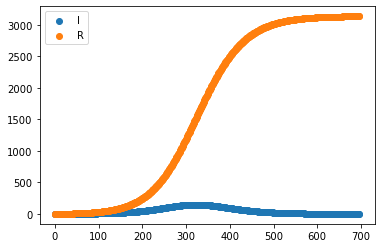

In [147]:
fig, ax = plt.subplots()
#ax.scatter(sir_scenario1[:, 0], sir_scenario1[:, 1], label="S")
ax.scatter(sir_scenario1[:, 0], sir_scenario1[:, 2], label="I")
ax.scatter(sir_scenario1[:, 0], sir_scenario1[:, 3], label="R")
ax.legend()
plt.show()

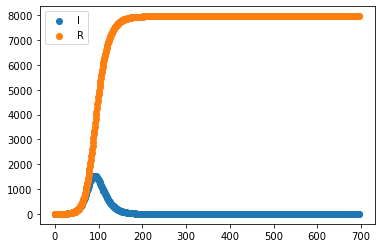

In [148]:
fig, ax = plt.subplots()
#ax.scatter(sir_scenario2[:, 0], sir_scenario2[:, 1], label="S")
ax.scatter(sir_scenario2[:, 0], sir_scenario2[:, 2], label="I")
ax.scatter(sir_scenario2[:, 0], sir_scenario2[:, 3], label="R")
ax.legend()
plt.show()

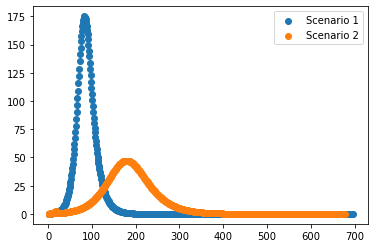

In [130]:
fig, ax = plt.subplots()
ax.scatter(sir_scenario1[1:, 0], sir_scenario1[:-1, 1] - sir_scenario1[1:, 1], label="Scenario 1")
ax.scatter(sir_scenario2[1:, 0], sir_scenario2[:-1, 1] - sir_scenario2[1:, 1], label="Scenario 2")
ax.legend()
plt.show()

In [111]:
sir_scenario2

array([[0.00000000e+00, 9.99900000e+03, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.99876968e+03, 1.15353789e+00, 7.67817876e-02],
       [2.00000000e+00, 9.99850401e+03, 1.33064178e+00, 1.65351846e-01],
       [3.00000000e+00, 9.99819755e+03, 1.53493003e+00, 2.67521251e-01],
       [4.00000000e+00, 9.99784406e+03, 1.77056468e+00, 3.85373556e-01],
       [5.00000000e+00, 9.99607051e+03, 3.36670568e+00, 5.62782493e-01],
       [6.00000000e+00, 9.99269923e+03, 6.40067047e+00, 9.00104464e-01],
       [7.00000000e+00, 9.98629556e+03, 1.21633053e+01, 1.54113658e+00],
       [8.00000000e+00, 9.97413732e+03, 2.31032903e+01, 2.75939038e+00],
       [1.00000000e+01, 9.96883231e+03, 2.66349031e+01, 4.53278213e+00],
       [1.10000000e+01, 9.96271967e+03, 3.07029594e+01, 6.57737357e+00],
       [1.20000000e+01, 9.95567863e+03, 3.53872760e+01, 8.93409747e+00],
       [1.30000000e+01, 9.94757235e+03, 4.07783487e+01, 1.16493050e+01],
       [1.40000000e+01, 9.93824037e+03, 4.69819327e

<function __main__.predict_sir(N, params_t, perc_recovered)>